# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#looked through all warnings and they are not a big deal, will now suppress them for sake of cleanliness
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_deposit = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Check for duplicates
print(len(df_deposit[df_deposit.duplicated()]))
#not that many, lets just leave them in, they could even be legitimate dupes
print(len(df_deposit) - len(df_deposit.dropna()))

12
0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
#Let's look at the data holistically first:

#only need to run once
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_deposit, title="Pandas Profiling Report")
# profile.to_file("Pandas_profiling_report.html")

In [6]:
#Based on this breakdown of unknown values, we can probably say that it is fine to leave these values in the model.
#We can remove them later if it turns out they are problematic, but it is good to train our model and perform our 
#cross val on some incomplete data since in the real world not all of the data will be complete.
print((df_deposit == "unknown").sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


### List of features that do not need to be changed (except maybe scaled for certain models)
1. age

### List of features that need to be encoded to numeric
2. job
3. marital
4. education
5. default
6. housing
7. loan


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Objective:

The objective of this project is to determine what factors lead to someone making a long term deposit. It's important to note that one of the most important factors here, the interest rate offered for the long term deposit, is not present in the data. It is stated in write-up that they were offered "good" interest rates, but that is... not exactly helpful.

With that being said there is plenty of data here to analyze. 

Our ultimate goals can be divided into a few sections:
1. Not waste as much time or as many resources by marketing by reducing "false positives" (clients who will not go on to make a long term deposit)
2. Figure out which clients are likely to want a long-term deposit so we can spend more time and resources on turning them into clients with marketing campaigns... etc...)
3. Figure out if there are any specific conditions under which clients are more likely to be responsive (i.e. consumer price index low/high, or consumer confidence index low/high. This is also an example of a time it would be helpful to know what the interest rates being offered to the clients are, but the model may be able to overcome that limitation of the data regardless.)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:
#First, we remove the unknown from the education column since we will be using an ordinal encoder for that one specifically:
df_deposit = df_deposit[df_deposit['education'] != 'unknown']

In [9]:
#remove age for now and put it back in at the end, it was causing issues with data type
X = df_deposit[['job', 'marital', 'education', 'default', 'housing', 'loan']]
y = df_deposit['y']

In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor

In [11]:
categorical_columns = X.select_dtypes(include=["object"]).drop("education", axis=1).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']]), ['education']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
verbose_feature_names_out=False
)

In [12]:
preprocessor.fit_transform(X)

<39457x26 sparse matrix of type '<class 'numpy.float64'>'
	with 236724 stored elements in Compressed Sparse Row format>

In [13]:
X = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X), columns = preprocessor.get_feature_names_out())

In [14]:
df_deposit.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
#was getting a very weird bug with NaNs being randomly inserted into X when using X['age'] = df_deposit['age']
i = 0
X['age'] = np.ones(39457)
for age in df_deposit['age']:
    X['age'][i] = age
    i = i + 1

In [16]:
y = LabelEncoder().fit_transform(y)

In [17]:
y

array([0, 0, 0, ..., 0, 1, 0])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#First we will try to do 80% training and 20% test, but later we will probably change to K fold cross validation if all goes well.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18, test_size = .2)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
from sklearn.dummy import DummyClassifier

In [21]:
model_dummy = DummyClassifier().fit(X_train, y_train)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#this should default to l2 regularization so we dont need to standardize the dataa
%time model_logreg = LogisticRegression(max_iter = 100000).fit(X_train, y_train)

CPU times: total: 594 ms
Wall time: 488 ms


### Problem 9: Score the Model

What is the accuracy of your model?

In [24]:
print(model_dummy.score(X_test, y_test))

0.883933096806893


In [25]:
#exact same as dummy model - very bad first run
print(model_logreg.score(X_test, y_test))

0.883933096806893


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [28]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
scaler = StandardScaler()
pipe_SVC = Pipeline([("scaler", scaler), ("model", SVC(coef0 = 1))])
pipe_KNN = Pipeline([("scaler", scaler), ("model", KNeighborsClassifier())])
model_dtree = DecisionTreeClassifier()

In [30]:
%time pipe_SVC.fit(X_train, y_train)

CPU times: total: 29.7 s
Wall time: 29.7 s


Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(coef0=1))])

In [31]:
%time pipe_KNN.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 29 ms


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [32]:
%time model_dtree.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 80 ms


DecisionTreeClassifier()

In [33]:
results_dict = {"Model": ["SVD", "KNN", 'DTree', 'LogReg'],
               "Train Time": [29.7, .0312, .0781, .594,
               "Train Accuracy": [pipe_SVC.score(X_train, y_train), 
                                  pipe_KNN.score(X_train, y_train), model_dtree.score(X_train, y_train),
                                 model_logreg.score(X_train, y_train)],
               "Test Accuracy": [pipe_SVC.score(X_test, y_test), 
                                  pipe_KNN.score(X_test, y_test), model_dtree.score(X_test, y_test),
                                model_logreg.score(X_train, y_train)]}

In [34]:
results_df = pd.DataFrame(results_dict)

In [35]:
#note, that these are the results of the first run through, but not all run throughs will be the exact same
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,SVD,11.5000,0.889973,0.883933
1,KNN,0.0312,0.893363,0.875570
2,DTree,0.0625,0.916521,0.863659
3,LogReg,0.0422,0.889973,0.889973


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [36]:
#We will keep all features here except age, because we do not want the model to be age discriminatory
X = X.drop("age", axis=1)

In [37]:
#We will do K fold cross validation using GridSearchCV, so we will only need a small test size of 10%:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18, test_size = .1)

In [38]:
from sklearn.model_selection import GridSearchCV

### Dummy Classifier results (Recall as metric)

In [118]:
#from now on we will be using recall as a metric. The justification for this is that we want to find as many potential depositers as possible.

In [39]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [40]:
#We are now going to go with recall because we want as many of the valid leads as possible to be discovered by the model.
model_dummy = DummyClassifier().fit(X_train, y_train)

In [41]:
#understandably bad score
recall_score(y_test, model_dummy.predict(X_test))

0.0

Text(0.5, 1.0, 'Dummy Confusion Matrix')

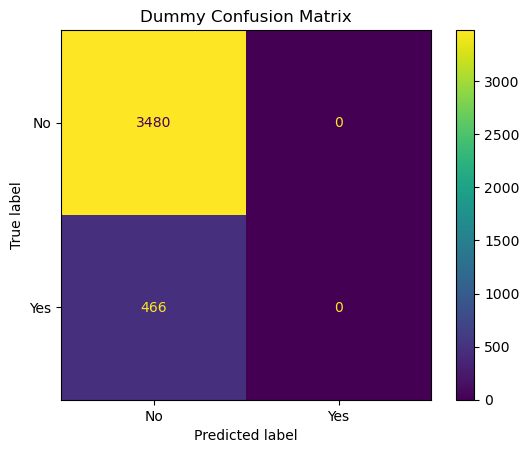

In [42]:
cf_dummy = confusion_matrix(y_test, model_dummy.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_dummy, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("Dummy Confusion Matrix")

### LogisticRegression Model- no polynomials

In [43]:
params_logreg = param_dict = {'penalty': ["l1", "l2", "elasticnet"],
                             'C': [0.01, .1, 1, 10, 100],
                             "fit_intercept": [True, False],
                             "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

In [44]:
model_tuned_logreg = GridSearchCV(estimator = LogisticRegression(max_iter = 100000), param_grid = params_logreg, cv = 5, scoring='recall')

In [45]:
%time model_tuned_logreg.fit(X_train, y_train)

CPU times: total: 8min 54s
Wall time: 8min 54s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='recall')

In [46]:
#Not good, it is as bad as trivial model
recall_score(y_test, model_tuned_logreg.best_estimator_.predict(X_test))

0.0

Text(0.5, 1.0, 'LogReg Confusion Matrix')

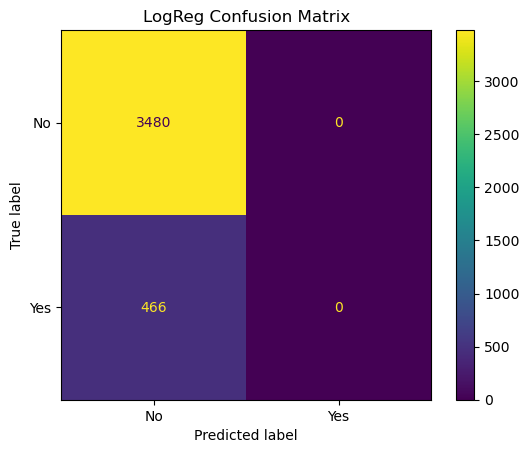

In [47]:
cf_logreg = confusion_matrix(y_test, model_tuned_logreg.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_logreg, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("LogReg Confusion Matrix")

In [48]:
#look at what it came up with for best params
print(model_tuned_logreg.best_params_)

{'C': 0.01, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [49]:
#Is it overfitted? No...
recall_score(y_train, model_tuned_logreg.best_estimator_.predict(X_train))

0.0

### Decision Tree Model

In [50]:
params_dtree = param_dict = {'criterion': ["gini", "entropy", "log_loss"],
                            'max_depth': [1, 2, 5, 10, None],
                            "min_samples_split": [2, 10, .1],
                            "min_samples_leaf": [1, 2, 10, .1]}

In [51]:
model_tuned_dtree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params_dtree, cv = 5, scoring='recall')

In [52]:
%time model_tuned_dtree.fit(X_train, y_train)

CPU times: total: 1min 24s
Wall time: 1min 24s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, None],
                         'min_samples_leaf': [1, 2, 10, 0.1],
                         'min_samples_split': [2, 10, 0.1]},
             scoring='recall')

In [53]:
#Still not good, only very slight improvement
recall_score(y_test, model_tuned_dtree.best_estimator_.predict(X_test))

0.004291845493562232

In [54]:
#Possibly slight overfit, but it doesn't matter, the predictive power is so poor
recall_score(y_train, model_tuned_dtree.best_estimator_.predict(X_train))

0.022431812388478207

Text(0.5, 1.0, 'Dtree Confusion Matrix')

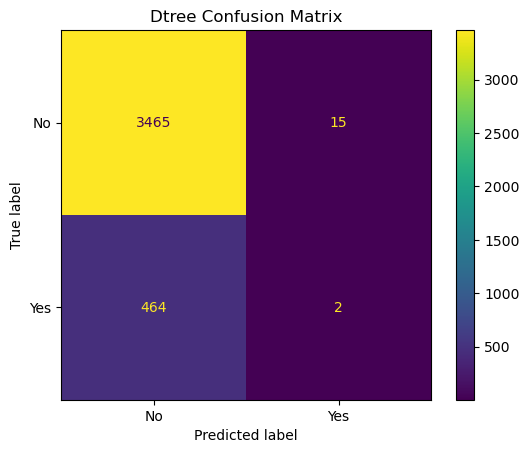

In [55]:
cf_dtree = confusion_matrix(y_test, model_tuned_dtree.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_dtree, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("Dtree Confusion Matrix")

In [56]:
#in this case let's specifically look at what the decision tree is doing if we can:
print(model_tuned_dtree.best_params_)
#It is going to be too big with max_depth None being the best params

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


### KNN Model

In [57]:
params_knn = param_dict = {'n_neighbors': [1, 2, 3, 5, 10, 100, 1000]}

In [58]:
#we need some scaled X for this one and the SVD as well
X_train_scaled = StandardScaler(with_mean=False).fit_transform(X_train)
X_test_scaled = StandardScaler(with_mean=False).fit_transform(X_test)

In [59]:
model_tuned_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params_knn, cv = 5, scoring='recall')

In [62]:
%time model_tuned_knn.fit(X_train_scaled, y_train)

CPU times: total: 15min 27s
Wall time: 1min 7s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 100, 1000]},
             scoring='recall')

In [63]:
#Best one by far so far, still not good
recall_score(y_test, model_tuned_knn.best_estimator_.predict(X_test))

0.060085836909871244

In [64]:
recall_score(y_train, model_tuned_knn.best_estimator_.predict(X_train))

0.055824624012235535

Text(0.5, 1.0, 'KNN Confusion Matrix')

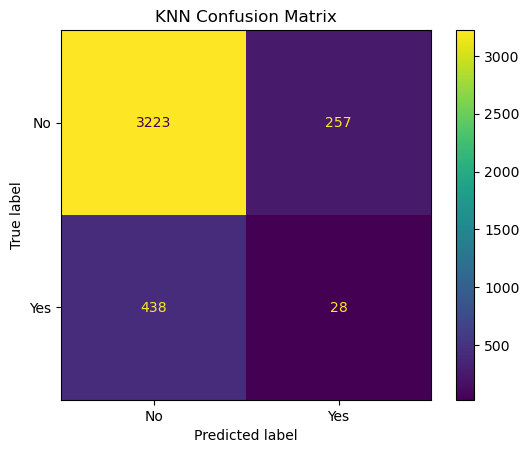

In [65]:
cf_knn = confusion_matrix(y_test, model_tuned_knn.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_knn, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("KNN Confusion Matrix")

### SVM Classifier

In [66]:
params_svc = param_dict = {'degree': [1, 2, 3]} 

In [67]:
model_tuned_svc = GridSearchCV(estimator = SVC(coef0 = 1), param_grid = params_svc, cv = 5, scoring='recall')

In [70]:
%time model_tuned_svc.fit(X_train_scaled, y_train)

CPU times: total: 2min 9s
Wall time: 2min 9s


GridSearchCV(cv=5, estimator=SVC(coef0=1), param_grid={'degree': [1, 2, 3]},
             scoring='recall')

In [71]:
#terrible still
recall_score(y_test, model_tuned_svc.best_estimator_.predict(X_test))

0.0

In [72]:
recall_score(y_train, model_tuned_svc.best_estimator_.predict(X_train))

0.0

Text(0.5, 1.0, 'SVC Confusion Matrix')

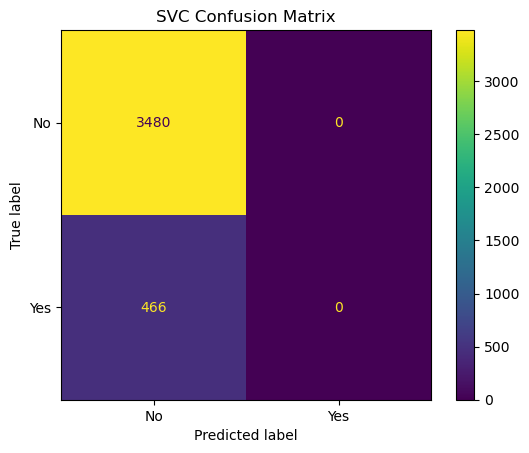

In [73]:
cf_svc = confusion_matrix(y_test, model_tuned_svc.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_svc, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("SVC Confusion Matrix")

# Part 2: Trying again with more features

In [74]:
X = df_deposit.drop("y", axis = 1 )

In [75]:
#This time, lets start by removing a highly coolinear feature that also has issues with being a very unusual type of data
X = X.drop("pdays", axis=1)
#remove age to avoid discrimination
X = X.drop("age", axis = 1)
#remove duration because we are told specifically we cant use it
X = X.drop("duration", axis = 1)

In [76]:
X

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [77]:
#new list of numeric and categorical columns
categorical_columns = X.select_dtypes(include=["object"]).drop("education", axis=1).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']]), ['education']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
verbose_feature_names_out=False
)

In [78]:
X = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X), columns = preprocessor.get_feature_names_out())

In [79]:
#have to do manually since we're excluding some of them semi-arbitrarily
num_cols = ['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [80]:
#was getting a very weird bug with NaNs being randomly inserted into X when using X['age'] = df_deposit['age']
i = 0
X[num_cols] = 1
for col in num_cols:
    for row in df_deposit[col]:
        X[col][i] = row
        i = i + 1
    i = 0

In [81]:
#for the sake of feature importances we will utilize the random splitting technique where we can figure out
#which features are less important than even a fully random generation of numbers
X['random_test'] = np.random.random()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 18, test_size = .2)

### LogisticRegression Model- more features

In [83]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score

In [84]:
params_logreg = param_dict = {'penalty': ["l1", "l2"],
                             'C': [0.01, .1, 1, 10, 100],
                             "solver": ["lbfgs", "liblinear", "sag", "saga"]}

In [85]:
#for logistic regression standardization can help interpretability, at the very least
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [86]:
#model is coming back with recall 1 (due to guessing all "yes") when using recall as a scoring. Let's switch to balanced accuracy. It seems its still a problem.
model_tuned_logreg_2 = GridSearchCV(estimator = LogisticRegression(max_iter = 10000), param_grid = params_logreg, cv = 5, scoring='balanced_accuracy')

In [87]:
%time model_tuned_logreg_2.fit(X_train_scaled, y_train)

CPU times: total: 23min 38s
Wall time: 23min 36s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='balanced_accuracy')

In [88]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

In [89]:
#still very bad, we can't even do feature importances with this lets try another approach again...
recall_score(y_test, model_tuned_logreg_2.best_estimator_.predict(X_test))

1.0

Text(0.5, 1.0, 'LogReg Confusion Matrix')

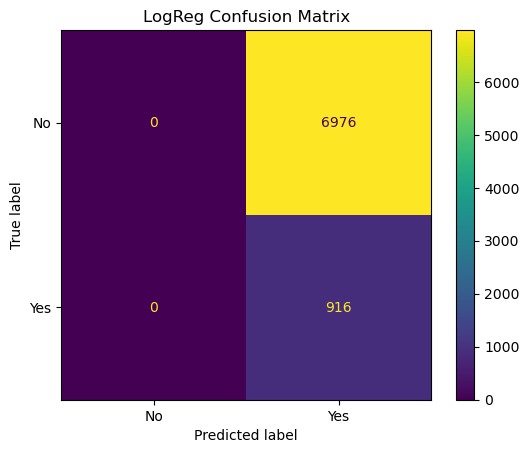

In [90]:
cf_logreg_2 = confusion_matrix(y_test, model_tuned_logreg_2.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_logreg_2, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("LogReg Confusion Matrix")

### KNN - with more features

In [101]:
params_knn = param_dict = {'n_neighbors': [1, 2, 3, 5, 10, 100, 1000]}

In [102]:
model_tuned_knn_2 = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params_knn, cv = 5, scoring='recall')

In [103]:
%time model_tuned_knn_2.fit(X_train_scaled, y_train)

CPU times: total: 4min 32s
Wall time: 22.2 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 5, 10, 100, 1000]},
             scoring='recall')

In [104]:
#still unusable
recall_score(y_test, model_tuned_knn_2.best_estimator_.predict(X_test))

0.0425764192139738

Text(0.5, 1.0, 'KNN Confusion Matrix')

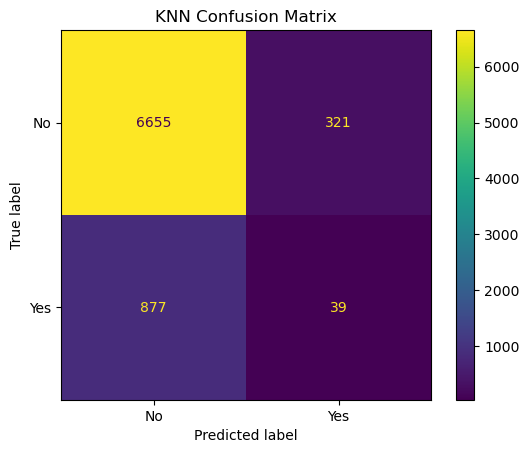

In [105]:
cf_knn_2 = confusion_matrix(y_test, model_tuned_knn_2.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_knn_2, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("KNN Confusion Matrix")

### Decision Tree - with more features

In [106]:
params_dtree = param_dict = {'criterion': ["gini", "entropy", "log_loss"],
                            'max_depth': [1, 2, 5, 10, None, 100],
                            "min_samples_split": [2, 10, .1],
                            "min_samples_leaf": [1, 2, 10, .1]}

In [107]:
model_tuned_dtree_2 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params_dtree, cv = 5, scoring='recall')

In [108]:
%time model_tuned_dtree_2.fit(X_train, y_train)

CPU times: total: 2min 40s
Wall time: 2min 40s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, None, 100],
                         'min_samples_leaf': [1, 2, 10, 0.1],
                         'min_samples_split': [2, 10, 0.1]},
             scoring='recall')

In [109]:
#much better, even if its not that amazing overall
recall_score(y_test, model_tuned_dtree_2.best_estimator_.predict(X_test))

0.324235807860262

In [110]:
#lets check the training fit for overfitting, it might overfit
recall_score(y_train, model_tuned_dtree_2.best_estimator_.predict(X_train))

0.8471062482004031

Text(0.5, 1.0, 'Dtree Confusion Matrix')

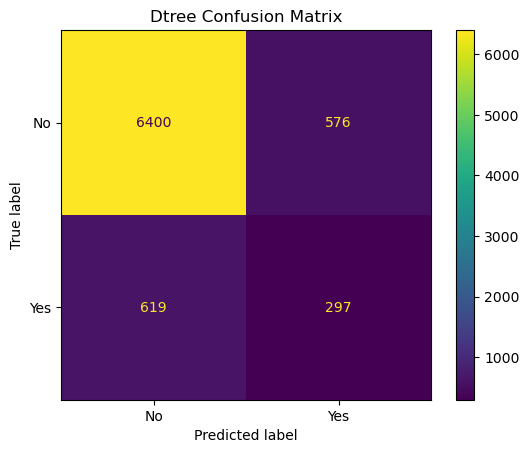

In [111]:
cf_dtree_2 = confusion_matrix(y_test, model_tuned_dtree_2.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_dtree_2, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("Dtree Confusion Matrix")

### Decision Tree - trying to increase performance

In [112]:
#reduce unimportant features to improve overfitting issue
print(model_tuned_dtree_2.best_estimator_.feature_importances_)


df_fimportances = pd.DataFrame([model_tuned_dtree_2.best_estimator_.feature_importances_], columns = X.columns)
df_islow = df_fimportances < .001
X = X.drop(X.columns[df_islow.any()].tolist(), axis = 1)

[0.09541986 0.02390494 0.01480156 0.00577697 0.00596969 0.0117242
 0.00869961 0.0111784  0.01238911 0.00624193 0.01985089 0.00571175
 0.00191754 0.01564214 0.02115014 0.02195709 0.0016284  0.00815082
 0.0123374  0.         0.0258029  0.00196822 0.02415316 0.01852126
 0.00216261 0.01668418 0.01140331 0.00261174 0.00121575 0.00108795
 0.00279158 0.00251266 0.00124711 0.00024938 0.00106868 0.00760959
 0.00161441 0.01896975 0.01865414 0.01348272 0.01426818 0.01735345
 0.01164912 0.00765458 0.03099122 0.10118811 0.01592698 0.00178804
 0.00796635 0.02406696 0.11589885 0.17298463 0.        ]


In [113]:
#let's try adding a max_depth 25 and 50, to see if maybe it will actually be better than None
params_dtree = param_dict = {'criterion': ["gini", "entropy", "log_loss"],
                            'max_depth': [1, 2, 5, 10, 25, 50],
                            "min_samples_split": [2, 10, .1],
                            "min_samples_leaf": [1, 2, 10, .1]}

In [114]:
#try again, better CV this time as well
model_tuned_dtree_3 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params_dtree, cv = 10, scoring='recall')
%time model_tuned_dtree_3.fit(X_train, y_train)

CPU times: total: 5min 40s
Wall time: 5min 40s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 10, 25, 50],
                         'min_samples_leaf': [1, 2, 10, 0.1],
                         'min_samples_split': [2, 10, 0.1]},
             scoring='recall')

In [115]:
#ever so slightly better, but we probably won't be getting much more out of this
recall_score(y_test, model_tuned_dtree_3.best_estimator_.predict(X_test))

0.32532751091703055

In [116]:
#still overfit, but we have tried many things and this is the best we can do for now. We will go on with our findings
recall_score(y_train, model_tuned_dtree_3.best_estimator_.predict(X_train))

0.8471062482004031

Text(0.5, 1.0, 'Dtree Confusion Matrix')

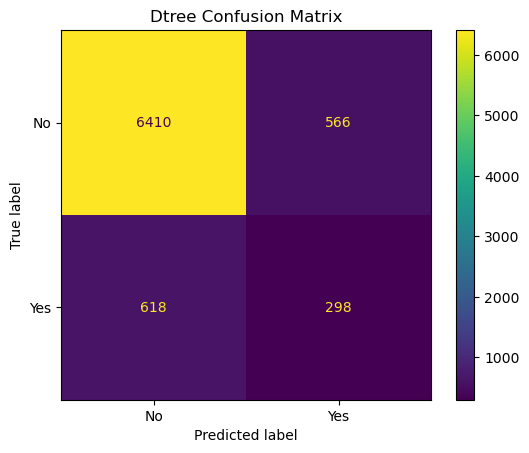

In [117]:
cf_dtree_3 = confusion_matrix(y_test, model_tuned_dtree_3.best_estimator_.predict(X_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_dtree_3, display_labels = ["No", "Yes"])
cm_display.plot()
plt.title("Dtree Confusion Matrix")